# Исследование успешности мобильного приложения

## Общая информация

В данном исследовании мы выступаем в роли маркетингового аналитика развлекательного приложения. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Нам предстоит изучить:  
- откуда приходят пользователи и какими устройствами они пользуются,  
- сколько стоит привлечение пользователей из различных рекламных каналов,  
- сколько денег приносит каждый клиент,  
- когда расходы на привлечение клиента окупаются,  
- какие факторы мешают привлечению клиентов.  

**Входные данные:** Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
- лог сервера с данными об их посещениях,  
- выгрузка их покупок за этот период,  
- рекламные расходы.   

**Задача:** Разобраться в причинах, почему последние несколько месяцев компания Procrastinate Pro+ терпит убытки, несмотря на огромные вложения в рекламу и помочь компании выйти в плюс.

**План работы:**
1. Изучение общей информации по файлам с данными.
2. Предобработка данных.
3. Задание функций для рассчёта LTV, ROI, удержания и конверсии.
4. Исследовательский анализ данных (EDA).
5. Маркетинг.
6. Оценка окупаемости рекламы.
7. Общий вывод.

## Знакомство с данными
### Чтение данных

In [48]:
# импорт всех необходимых для исследования библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [49]:
# чтение файлов с данными и сохранение в переменные
visits = pd.read_csv('/datasets/visits_info_short.csv') # журнал сессий
orders = pd.read_csv('/datasets/orders_info_short.csv') # покупки 
costs = pd.read_csv('/datasets/costs_info_short.csv')   # траты на рекламу

### Изучение данных

In [50]:
# вывод первых пяти строк датасета с визитами
visits.head(5)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [51]:
# вывод общей информации о датасете с визитами
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [52]:
# вывод первых пяти строк датасета с заказами
orders.head(5)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [53]:
# вывод общей информации о датасете с заказами
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [54]:
# вывод первых пяти строк датасета с расходами
costs.head(5)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [55]:
# вывод общей информации о датасете c расходами
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Выводы

Мы успешно открыли данные, вывели на экран первые 5 строк всех трёх датасетов, чтобы познакомиться с их структурой, но при этом не перегружать оперативную память.

Мы имеем дело с тремя небольшими датасетами, один из которых содержит 6 столбцов и 309901 строку (датасет с визитами), два других по 3 столбца и 40212 (датасет с заказами) и 1800 строк (датасет с расходами), соответственно.

Далее, когда мы вывели общую информацию по таблице, мы уже можем обратить внимание на то, что во всех трёх датасетах количество ненулевых строк во всех столбцах одинаковая, а значит, нам не придётся работать с пропусками (по крайней мере явными). Здесь же мы можем обратить внимание на типы данных в столбцах и насколько хорошо они подходят к данным, которые в них хранятся. Очевидно, мы будем менять тип данных в столбцах с датами.

## Предобработка данных

### Изменение названий столбцов

Приведём названия всех столбцов к нижнему регистру для соблюдения правил хорошего стиля, а также заменим пробелы на нижние подчёркивания:

In [56]:
# приводим столбцы датасетов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

# заменяем пробелы в названиях на нижние подчёркивания
visits.rename(columns = {
    'user id' : 'user_id',
    'session start' : 'session_start',
    'session end' : 'session_end'}, inplace = True)
orders.rename(columns = {
    'user id' : 'user_id',
    'event dt' : 'event_dt'}, inplace = True)

### Изменение типов данных

 Типы данных в столбцах по большей части нас устраивают, за исключением всех столбцов с датами, типом данных которых является `object`. Мы заменим его на `datetime64`:

In [57]:
# меняем тип данных во всех столбцах с датами
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

### Удаление дубликатов

In [58]:
# подсчёт явных дубликатов
display(visits.duplicated().sum())
display(orders.duplicated().sum())
costs.duplicated().sum()

0

0

0

### Вывод

Мы проверили все датасеты на предмет явных дубликатов, и их не обнаружилось. Также в данных нет пропусков. После приведения названий столбцов к "хорошему" стилю, а дат к нужному формату можно начинать исследовательскую работу.

## Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

Для дальнейшего исследования нам понадобятся функции для вычисления значений метрик и построения графиков. 

<a id='get_profiles'></a> *Функция для создания профилей пользователей*

In [59]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].astype('datetime64[W]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

<a id='get_retention'></a> *Функция для подсчёта Retention Rate*

In [60]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions = [],
    ignore_horizon = False
):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time

<a id='get_conversion'></a> *Функция для подсчёта конверсии*

In [61]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

<a id='get_ltv'></a> *Функция для подсчёта LTV и ROI*

In [62]:
#функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

<a id='filter_data'></a> *Функция для сглаживания данных*

In [63]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

<a id='plot_retention'></a> *Функция для построения графика Retention Rate*

In [64]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

<a id='plot_conversion'></a> *Функция для построения графика конверсии*

In [65]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

<a id='plot_ltv'></a> *Функция для визуализации LTV и ROI*

In [66]:
def plot_ltv(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

### Профили пользователей. Минимальная и максимальная даты привлечения пользователей.

Чтобы проще было делить клиентов на когорты, лучше заранее составить их профили — таблицу с деталями первого посещения каждого пользователя, такими как источник перехода на сайт, страна, устройство.

Для создания пользовательских профилей с датой первого посещения и источником перехода на сайт мы написали [функцию get_profiles](#get_profiles). Вызовем функцию get_profiles(), чтобы составить профили пользователей по данным сессий из датафрейма visits:

In [67]:
events = None
profiles = get_profiles(visits, orders, events, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,week,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,2019-05-02,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,2019-07-04,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,2019-09-26,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,2019-08-22,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,2019-09-26,False,0.230769
...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,2019-09-26,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,2019-10-17,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,2019-07-18,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,2019-09-26,False,0.205714


Также мы проверим первую и последнюю дату привлечения новых пользователей:

In [68]:
display(
profiles['first_ts'].min(),
profiles['first_ts'].max()
)

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-10-27 23:59:04')

* Они совпадают с теми, что были заявлены во входных датах.

Установим момент и горизонт анализа данных. По входным данным моментом анализа данных мы будем считать 1 ноября 2019 года. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Поэтому горизонтом анализа будет 14 дней:

In [69]:
# устанавливаем момент и горизонт анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

#### Выводы

Мы получили 150007 пользовательских профилей для дальнейшего анализа.

В каждом профиле есть данные о дате первого посещения, стране, устройстве и рекламном источнике, который мотивировал пользователя посетить интернет-магазин, а также информацию о том, является ли пользователь покупателем.

* Момент анализа - 2019-11-13
* Горизонт анализа - 14 дней

### Страны пользователей. Доля платящих пользователей по странам.

Для начала выясним, из каких стран приходят новые пользователи:

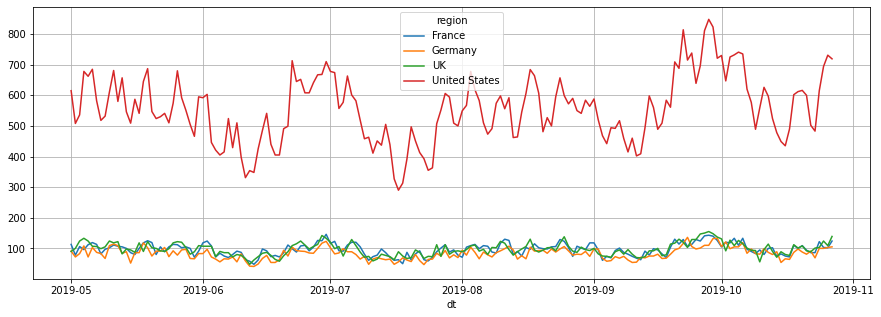

In [70]:
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='region',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

* Больше половины пользователей из США, остальные почти поровну разделены между Германией, Великобританией и Францией.

Теперь выясним, на какую страну приходится больше всего платящих пользователей. Для этого построим таблицу, отражающую количество пользователей и долю платящих из каждой страны:

In [71]:
profiles.groupby('region').agg({'payer': 'count'}).merge(
    profiles.groupby('region').agg({'payer': 'mean'}), how='outer', on='region').rename(
    columns={'payer_x': 'users', 'payer_y': 'payers, %'}).sort_values(by='payers, %', ascending=False)

,users,"payers, %"
region,,
United States,100002,0.069019
Germany,14981,0.041119
UK,17575,0.039829
France,17450,0.037994


#### Выводы

Больше всего доля платящих пользователей в США, а меньше всего во Франции.

### Устройства пользователей. Доля платящих пользователей по устройствам.

Узнаем, какими устройствами пользуются клиенты:

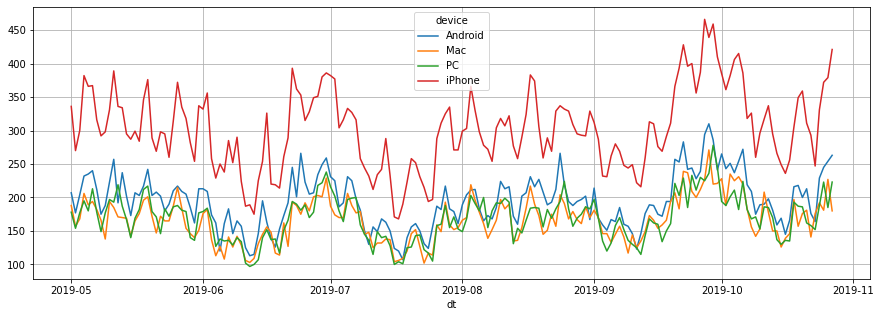

In [72]:
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='device',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

* Чаще всего пользователи заходят через iPhone, реже всего через PC и Mac.

Теперь построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:

In [73]:
profiles.groupby('device').agg({'payer': 'count'}).merge(
    profiles.groupby('device').agg({'payer': 'mean'}), how='outer', on='device').rename(
    columns={'payer_x': 'users', 'payer_y': 'payers, %'}).sort_values(by='payers, %', ascending=False)

,users,"payers, %"
device,,
Mac,30042,0.063644
iPhone,54479,0.062079
Android,35032,0.058518
PC,30455,0.050468


#### Выводы

Самая большая доля платящих пользователей приходится на пользователей Mac, а самая маленькая на пользователей PC.

### Рекламные источники привлечения

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей:

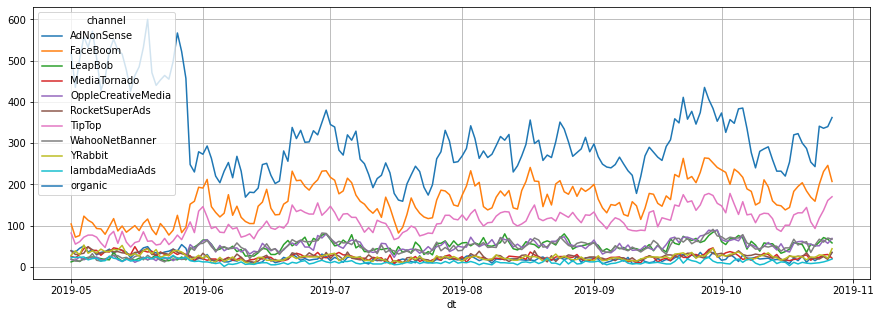

In [74]:
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

* Чаще всего новые посетители приходили из источника `Organic`, а реже всего из `lambdaMediaAds`. Мы видим, что в мае органический источник особенно преобладал, а все остальные сильно проигрывали ему, начиная с июля разница в привлечении новых посетителей между источниками стабильна, количество новых пользователей, привлекаемых каждым источником не опускается ниже определённого уровня.
* Без учёта органических пользователей больше всего новых пользователей привлёк канал FaceBoom.

Построим таблицу с количеством новых пользователей, привлекаемых каждым каналом, а также долю платящих среди них:

%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

In [75]:
profiles.groupby('channel').agg({'payer': 'count'}).merge(
    profiles.groupby('channel').agg({'payer': 'mean'}), how='outer', on='channel').rename(
    columns={'payer_x': 'users', 'payer_y': 'payers, %'}).sort_values(by='payers, %', ascending=False)

,users,"payers, %"
channel,,
FaceBoom,29144,0.122049
AdNonSense,3880,0.113402
lambdaMediaAds,2149,0.104700
TipTop,19561,0.096007
RocketSuperAds,4448,0.079137
WahooNetBanner,8553,0.052964
YRabbit,4312,0.038265
MediaTornado,4364,0.035747
LeapBob,8553,0.030633


#### Выводы

Как мы видим из таблицы, несмотря на то, что большего всего пользователей приходят органическим путём, он имеет самую маленькую долю платящих пользователей. Самая большая же доля приходится на каналы FaceBoom и AdNonSense.

## Маркетинг

Посчитаем общую сумму расходов на маркетинг: 

In [76]:
costs['costs'].sum().round()

105497.0

Теперь выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник:

In [77]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Построим визуализацию динамики изменения расходов во времени по каждому источнику. Сначала по неделям:

In [78]:
costs['month'] = costs['dt'].astype('datetime64[M]') # создаём новый столбец с месяцами
costs['week'] = costs['dt'].astype('datetime64[W]') # создаём новый столбец с неделями

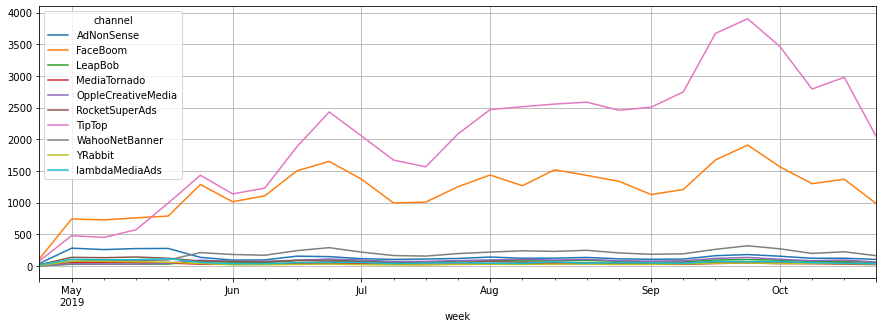

In [79]:
%matplotlib inline

costs.pivot_table(
    index='week',  # недели первых посещений
    columns='channel',  # источники переходов
    values='costs',  # ID пользователей
    aggfunc='sum'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

Теперь по месяцам:

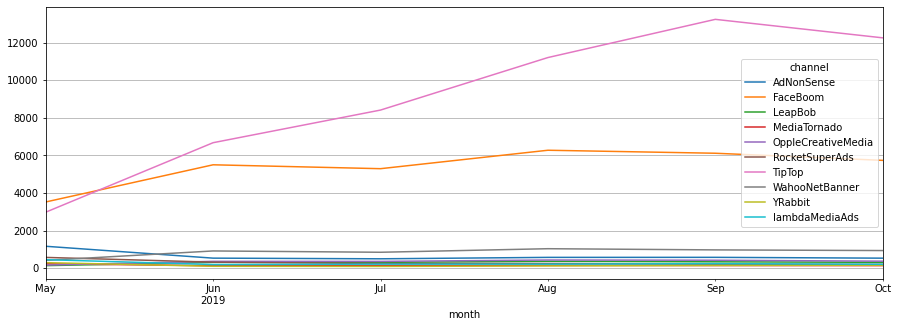

In [80]:
%matplotlib inline

costs.pivot_table(
    index='month',  # недели первых посещений
    columns='channel',  # источники переходов
    values='costs',  # ID пользователей
    aggfunc='sum'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

* Больше всего было потрачено на привлечение пользователей из источника Tip Top, а меньше всего на YRabbit.

И наконец, узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника:

In [81]:
profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


* Самым дорогим источником пользователей стал Tip Top, а самым дешёвым LeapBob, органические пользователи пришли в приложение сами, поэтому стоимость их привлечения равно нулю.

Теперь выясним, как меняется стоимость привлечения для каждого источника от когорты к когорте. Для этого построим сводную таблицу, в которой названиями строк будут даты привлечения пользователей, названиями столбцов — каналы привлечения, а значениями — средний CAC, и построим по ней график истории изменений:

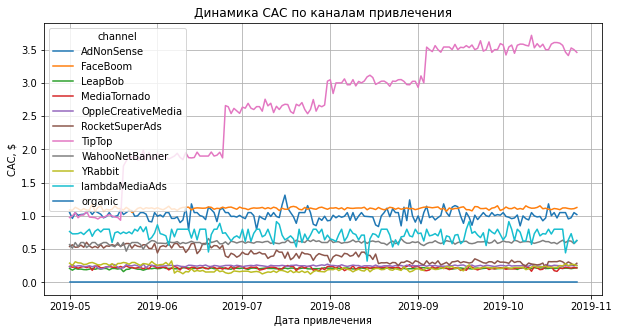

In [82]:
# строим график истории изменений CAC по каналам привлечения

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

### Выводы

* Дороже всего в среднем обходятся пользователи, привлечённые на ресурсах Tip Top и FaceBoom, дешевле всего в LeapBob, MediaTornado, YRabbit и OppleCreativeMedia.
* Стоимость привлечения новых пользователей на всех ресурсах остаётся стабильной, кроме Tip Top: стоимость привлечения новых пользователей с этого ресурса растёт каждый месяц на 0.5

## Оценка окупаемость рекламы.

Используя графики LTV, ROI и CAC, мы проанализируем окупаемость рекламы.

### Рассчёт LTV, CAC и ROI

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI [функции для расчёта LTV и ROI](#get_ltv) и [функции для визуализации LTV и ROI](#plot_ltv):

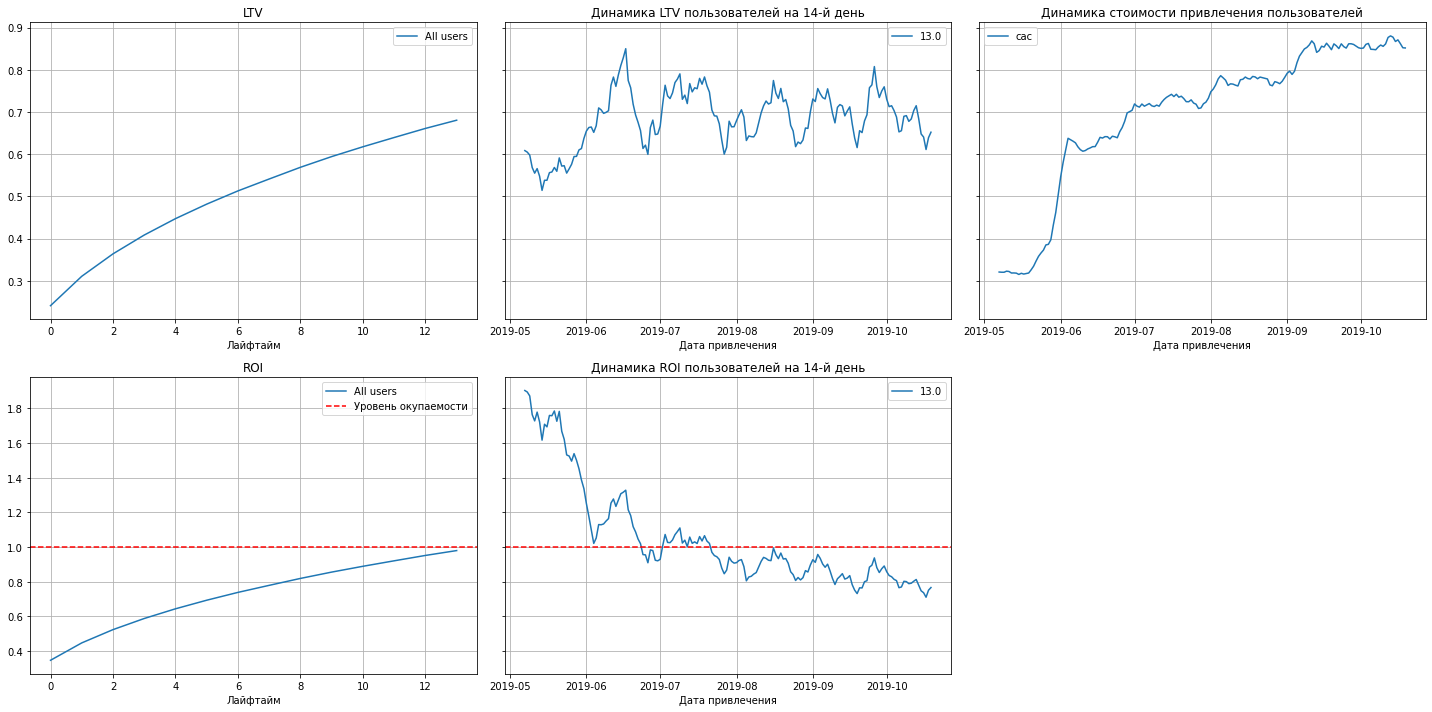

In [83]:
# исключаем из анализа органических пользователей, так как они бесплатные
profiles_new = profiles.query("channel != 'organic'")
# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# постройте графики LTV, CAC и ROI
plot_ltv(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### Выводы

* Реклама не окупается. ROI в конце двух недель достигает лишь 80%.
* CAC стремительно растёт вверх, а значит рекламный бюджет увеличивается.
* LTV равномерно растёт, значит с этим показателем всё в порядке.

### Анализ окупаемости рекламы с разбивкой по устройствам.

Построем графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по устройствам:

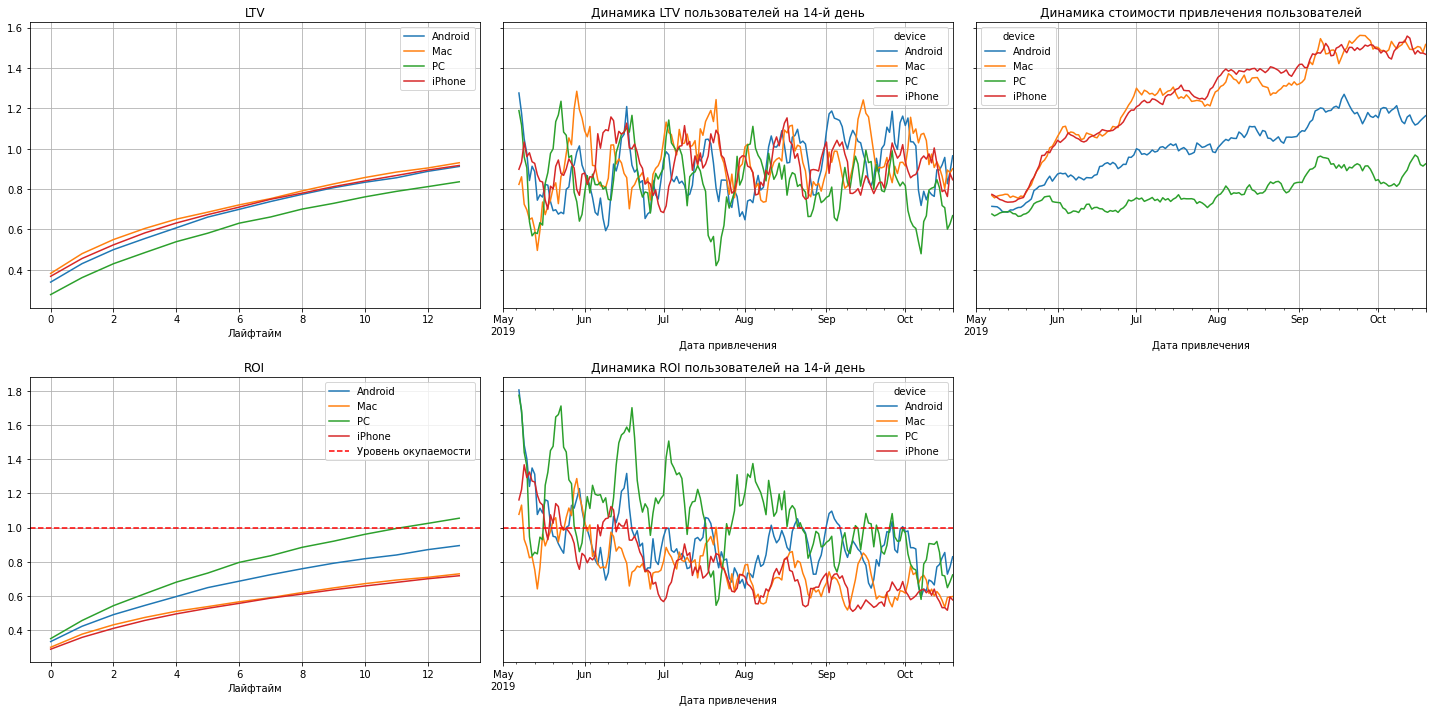

In [84]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=['device']
)
plot_ltv(ltv, ltv_history, roi, roi_history, horizon_days, window=7)

#### Выводы

* Привлечение пользователей PC окупается лишь на 13-й день, в то время как привлечение пользователей Android, iPhone и Mac не окупается даже на 14-й день.
* Затраты на привлечение пользователей в мае были значительно ниже, чем затраты в июне и последующих месяцах.
* Привлечение пользователей iPhone и Mac обходится дороже, чем привлечение пользователей Android и PC.
* LTV пользователей PC ниже, чем у других устройств.
* Затраты на привлечение пользователей iPhone и Mac перестали окупаться в июле, а затраты на привлечение пользователей Android и PC начали переставать окупаться в августе.

### Анализ окупаемости рекламы с разбивкой по странам.

Изучим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по странам:

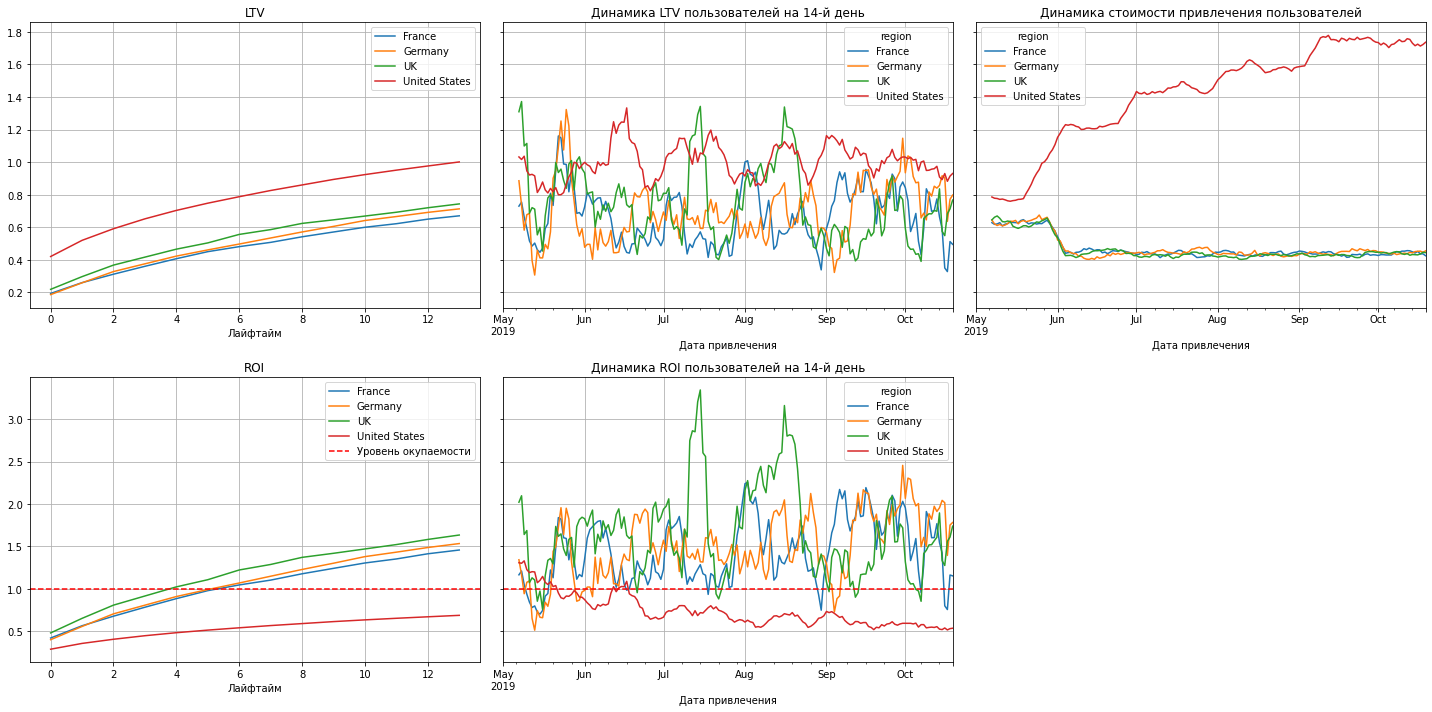

In [85]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=['region']
)
plot_ltv(ltv, ltv_history, roi, roi_history, 14, window=7)

#### Выводы

* LTV у пользователей из США выше, чем у остальных пользователей.
* Привлечение пользователей из США, начиная с июня, обходится в несколько раз дороже, чем привлечение пользователей из Германии, Франции и Великобритании. В то время как привлечение пользователей из Германии, Франции и Великобритании стало дешевле в июне и удерживалось на стабильном уровне всё время.
* Привлечение пользователей из США не окупается даже через две недели, в то время как пользователи из трёх других стран окупаются на 5-6-й день.
* Затраты на привлечение пользователей из США перестали окупаться в июле.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам.

И наконец построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI с разбивкой по каналам привлечения:

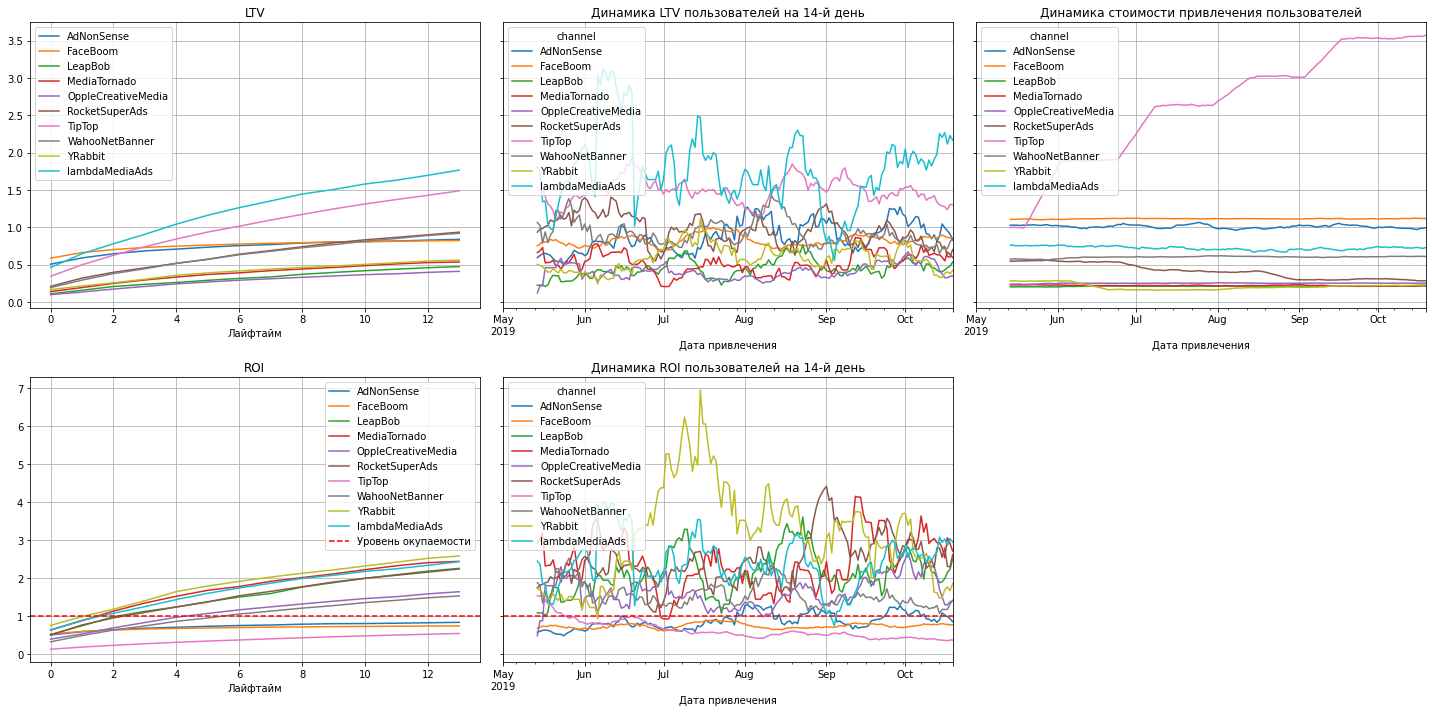

In [86]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles_new, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_ltv(ltv, ltv_history, roi, roi_history, 14, window=14)

#### Выводы

* LTV выше всего у пользователей, привлечённых каналом lambdaMediaAds и TipTop.
* Привлечение пользователей с помощью TipTop с каждым месяцем дороже, чем с помощью других ресурсов.
* Привлечение пользователей с помощью каналов TipTop, FaceBoom и AdNonSense не окупается.
* Самая лучшая окупаемость привлечения новых пользователей у канала YRabbit.

### Проверка конверсии пользователей и динамики её изменения.

Построим и изучим графики общей конверсии. Для этого нам понадобится [функция расчёта конверсии](#get_conversion) и [функция для визуализации конверсии](#plot_conversion).

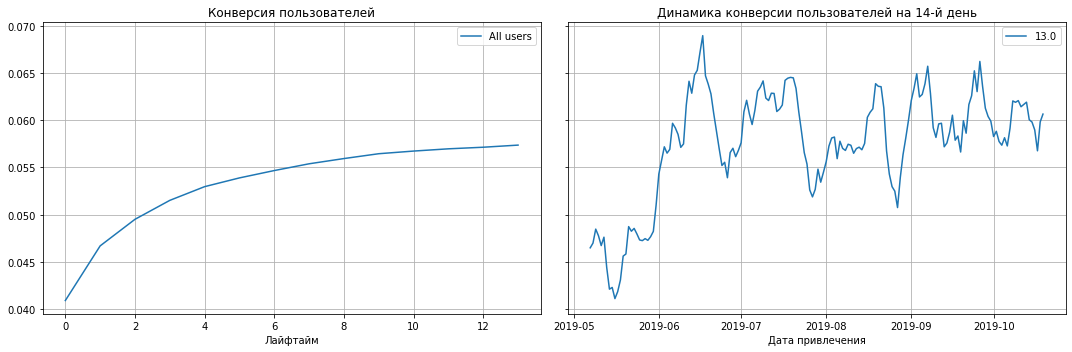

In [87]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

* Конверсия всех пользователей плавно растёт в течение двух недель.
* Конверсия пользователей, начиная с июня, не падает ниже 5%.

#### Проверка конверсии пользователей и динамики её изменения с разбивкой по устройствам.

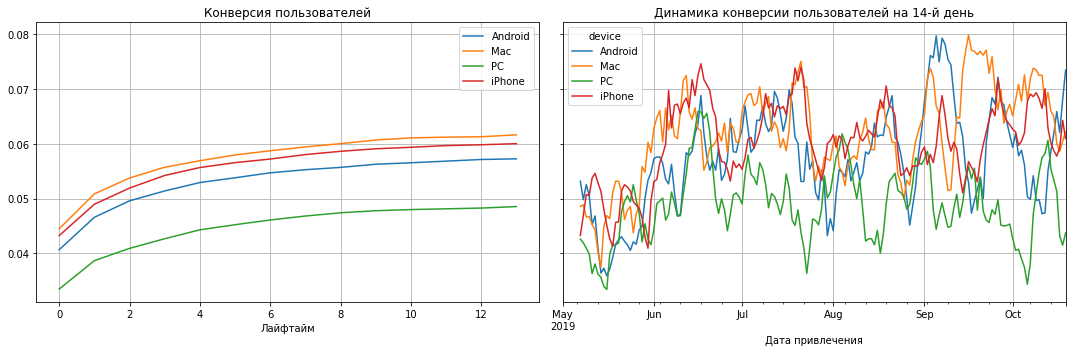

In [88]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

* Выше всего конверсия у пользователей Mac и iPhone, ниже всего у пользователей PC.

#### Проверка конверсии пользователей и динамики её изменения с разбивкой по странам.

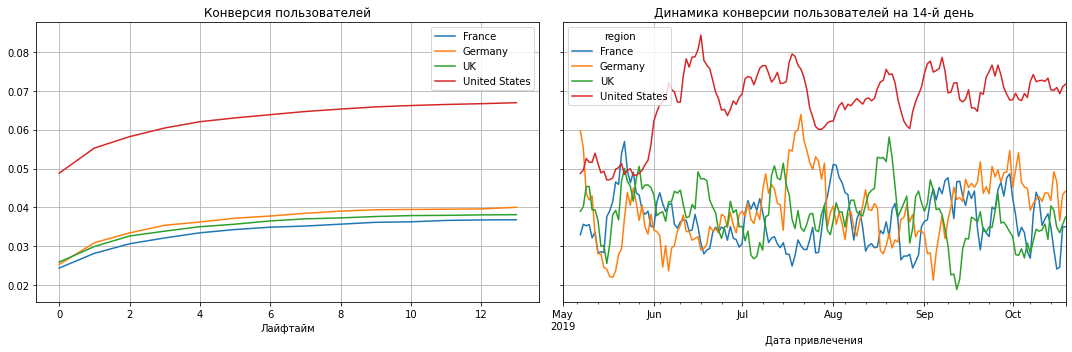

In [89]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

* Самой высокой конверсией обладают пользователи из США, к концу двух недель их конверсия почти достигает 7%.
* Конверсия пользователей из Франции, Германии и Великобритании не превышает 4% даже на конец второй недели.

#### Проверка конверсии пользователей и динамики её изменения с разбивкой по каналам привлечения.

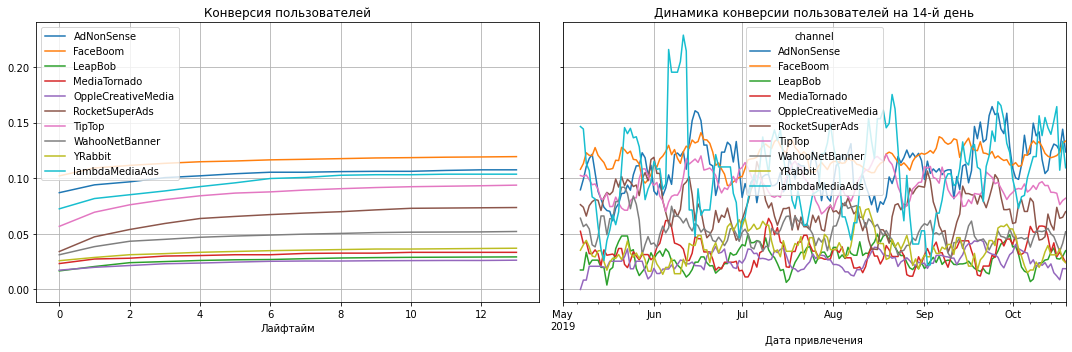

In [90]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query("channel != 'organic'"), orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

* Самая высокая конверсия у пользователей, привлечённых каналом FaceBoom.
* Самой низкой конверсией (меньше 0,005%) обладают пользователи, привлечённые каналами OppleCreativeMedia, LeapBob, MediaTornado, YRabbit, WahooNetBanner.

### Проверка удержания пользователей и динамики его изменения.

Теперь проверим, как удерживаются пользователи. Воспользуемся [функцией удержания](#get_retention) и [функцией для построения графика удержания](#plot_retention):

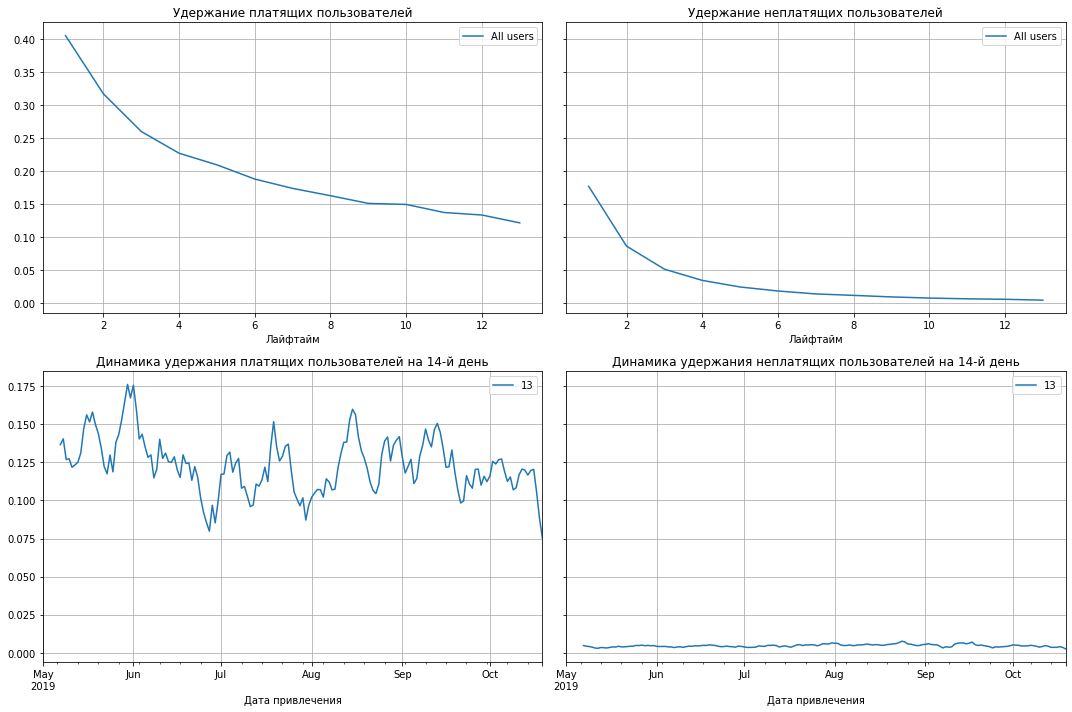

In [91]:
retention_row, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days,
)
plot_retention(
    retention, retention_history, horizon_days, window=7
)

* Пользователи очень плохо удерживаются.
* К концу двух недель остаётся лишь около 10% платящих пользователей.
* Количество бесплатных пользователей уже на второй день падает до 10% и затем стремится к нулю до конца двух недель.

#### Проверка удержания пользователей и динамики её изменения с разбивкой по устройствам.

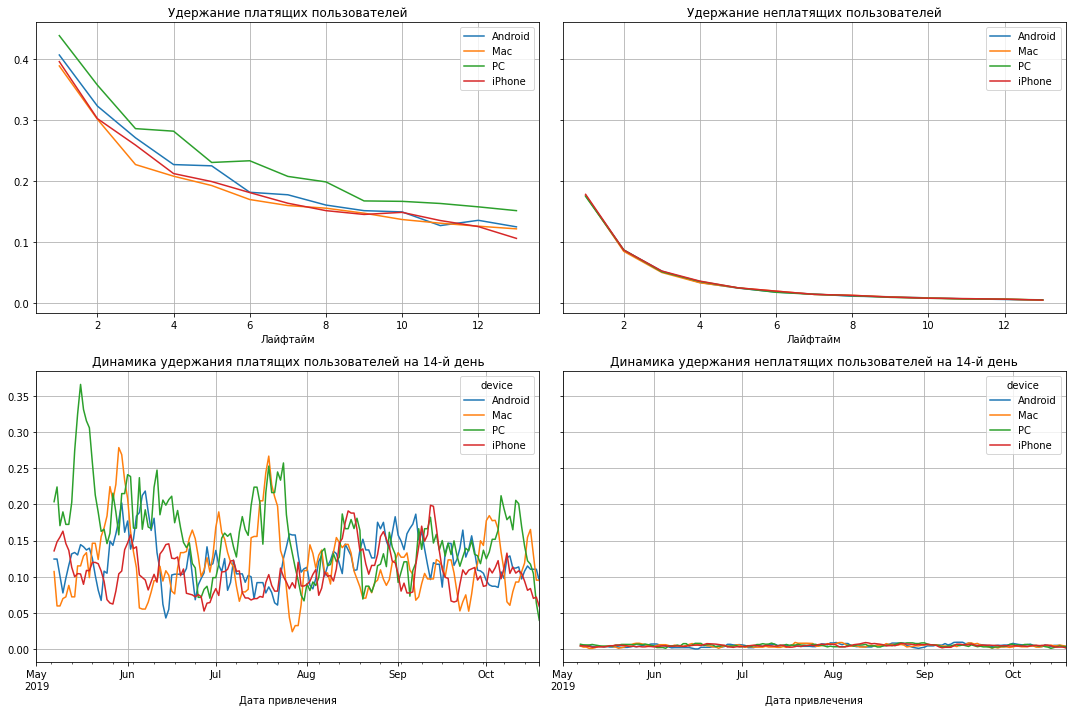

In [92]:
retention_row, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(
    retention, retention_history, horizon_days, window=7
)

* Процент удержания всех платных пользователей плавно опускается до 10% к концу двух недель.
* Бесплатных пользователей уже на второй день становится всего 10% и далее их количество уменьшается.

#### Проверка удержания пользователей и динамики её изменения с разбивкой по странам.

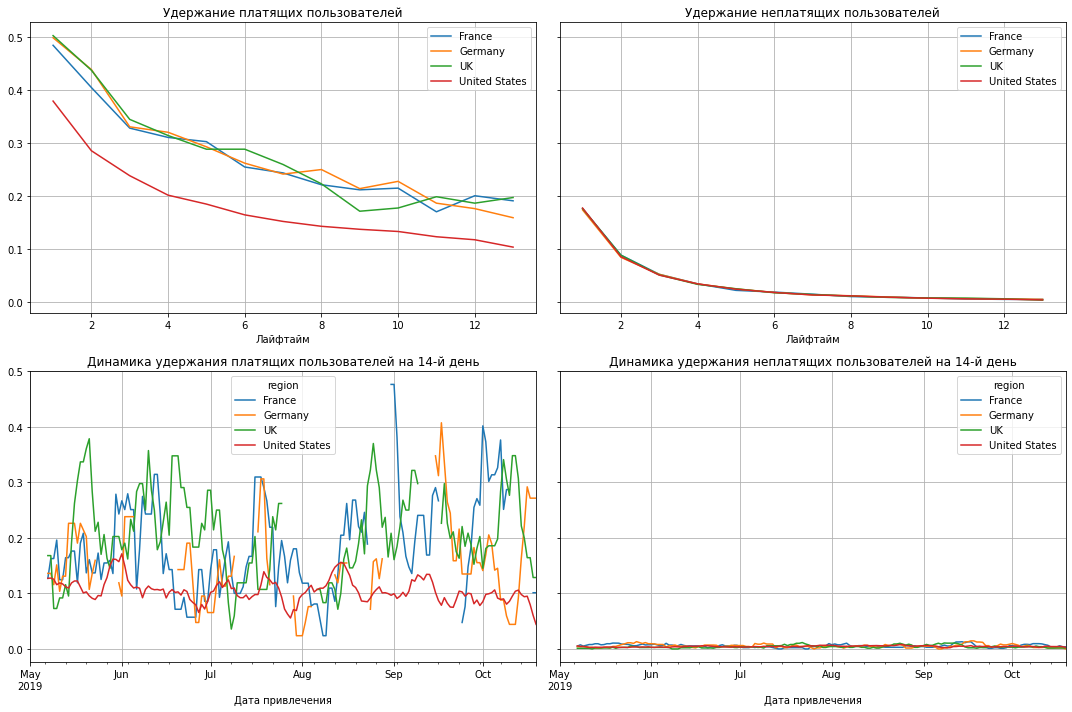

In [93]:
retention_row, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(
    retention, retention_history, horizon_days, window=7
)

* С разбивкой по странам та же картина: платящих пользователей к концу второй недели остаётся 10%, а неплатящих становится столько же уже на второй день.
* Пользователи из США удерживаются хуже всего.

#### Проверка удержания пользователей и динамики её изменения с разбивкой по каналам привлечения.

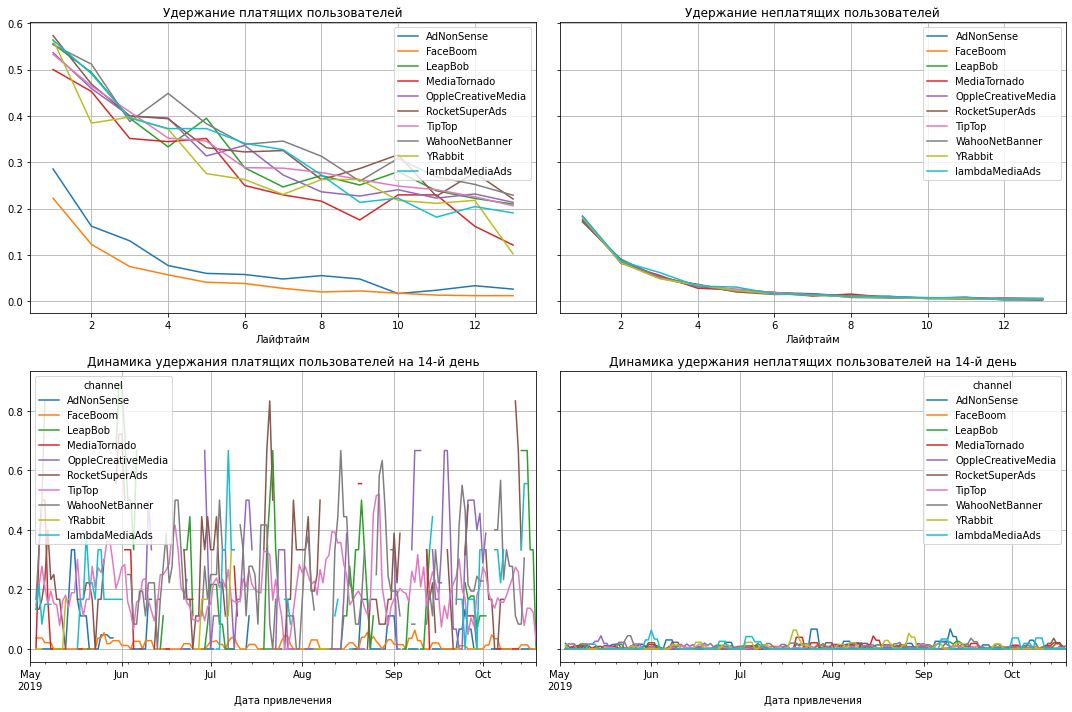

In [94]:
retention_row, retention, retention_history = get_retention(
    profiles.query("channel != 'organic'"), visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(
    retention, retention_history, horizon_days, window=3
)

* Хуже всего удерживаются пользователи, привлечённые каналами FaceBoom и AdNonSense.
* Лучше всего удерживаются пользователи, привлечённые каналами WahooNetBanner и RocketSuperAds.

## Общий вывод

Мы провели анализ данных о пользователях приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года. Мы изучили лог сервера с данными о посещениях, выгрузку покупок за этот период, рекламные расходы. Перед нами стояла **задача** разобраться в причинах, почему последние несколько месяцев компания терпит убытки, несмотря на огромные вложения в рекламу и помочь компании выйти в плюс.

На этапе **предобработки данных** мы:
* привели названия всех столбцов к нижнему регистру, а также заменим пробелы на нижние подчёркивания,
* заменили тип данных в столбцах с датами на `datetime`,
* не обнаружили пропусков и дубликатов в данных.

Для дальнейшего исследования мы **определили необходимые функции** для вычисления метрик и построения графиков:
* get_profiles() — для создания профилей пользователей,
* get_retention() — для подсчёта Retention Rate,
* get_conversion() — для подсчёта конверсии,
* get_ltv() — для подсчёта LTV.
* filter_data() — для сглаживания данных,
* plot_retention() — для построения графика Retention Rate,
* plot_conversion() — для построения графика конверсии,
* plot_ltv_roi — для визуализации LTV и ROI.
 
На этапе **исследовательского анализа данных**: 
* мы получили 150007 пользовательских профилей для дальнейшего анализа,
* определили момент анализа - 2019-11-13, горизонт анализа - 14 дней,
* изучили характеристики пользователей:
  * Больше половины пользователей из США, остальные почти поровну разделены между Германией, Великобританией и Францией. Больше всего доля платящих пользователей в США, а меньше всего во Франции.
  * Чаще всего пользователи заходят через iPhone, реже всего через PC и Mac. Самая большая доля платящих пользователей приходится на пользователей Mac, а самая маленькая на пользователей PC.
  * Без учёта органических пользователей больше всего новых платящих пользователей привлёк канал FaceBoom, а меньше всего lambdaMediaAds. 

Этап **маркетинга**:
* всего на привлечение новых пользователей было потрачено 105497,
* больше всего было потрачено на привлечение пользователей из источника Tip Top (54751.3), а меньше всего на YRabbit (944.22),
* самым дорогим источником пользователей стал Tip Top (2.8 за пользователя), а самым дешёвым LeapBob (0.2 за пользователя), органические пользователи пришли в приложение сами, поэтому стоимость их привлечения равно нулю,
* дороже всего в среднем обходятся пользователи, привлечённые на ресурсах Tip Top и FaceBoom, дешевле всего в LeapBob, MediaTornado, YRabbit и OppleCreativeMedia,
* стоимость привлечения новых пользователей на всех ресурсах оставалась стабильной, кроме Tip Top: стоимость привлечения новых пользователей с этого ресурса росла каждый месяц на 0.5

Этап **оценки окупаемости рекламы**:
* Реклама не окупается. ROI в конце двух недель достигает лишь 80%.
* CAC стремительно растёт вверх, а значит рекламный бюджет увеличивается.
* Затраты на привлечение пользователей в мае были значительно ниже, чем затраты в июне и последующих месяцах.
* Оценка по устройствам:
  * привлечение пользователей PC окупается лишь на 12-й день, в то время как привлечение пользователей Android, iPhone и Mac не окупается даже на 14-й день; при этом, привлечение пользователей iPhone и Mac обходится дороже, чем привлечение пользователей Android и PC.
  * "Продолжительность жизни* пользователей PC ниже, чем у других устройств.
* Оценка по странам:
  * "Продолжительность жизни" у пользователей из США выше, чем у остальных пользователей.
  * Привлечение пользователей из США, начиная с июня, обходится в несколько раз дороже, чем привлечение пользователей из Германии, Франции и Великобритании. В то время как привлечение пользователей из Германии, Франции и Великобритании стало дешевле в июне и удерживалось на стабильном уровне всё время.
  * Привлечение пользователей из США не окупается, в то время как пользователи из трёх других стран окупаются на 5-6-й день.
* Оценка по каналам привлечения:
  * "Продолжительность жизни" выше всего у пользователей, привлечённых каналом lambdaMediaAds и TipTop.
  * Привлечение пользователей с помощью TipTop с каждым месяцем дороже, чем с помощью других ресурсов.
  * Привлечение пользователей с помощью каналов TipTop, FaceBoom и AdNonSense не окупается, лучшая окупаемость привлечения новых пользователей у канала YRabbit.

Выводы о **конверсии** пользователей:
* конверсия всех пользователей плавно растёт в течение двух недель,
* конверсия пользователей, начиная с июня, не падала ниже 50%,
* выше всего конверсия у пользователей Mac и iPhone, ниже всего у пользователей PC.
* самой высокой конверсией по странам обладают пользователи из США, к концу двух недель их конверсия почти достигает 70%, конверсия пользователей из Франции, Германии и Великобритании не превышает 40%,
* самая высокая конверсия по каналам привлечения у пользователей, привлечённых каналом FaceBoom, самая низкая (меньше 0,05%) обладают пользователи, привлечённые каналами OppleCreativeMedia, LeapBob, MediaTornado, YRabbit, WahooNetBanner.

Выводы об **удержании** пользователей:
* пользователи очень плохо удерживаются, к концу двух недель остаётся лишь 10% платящих пользователей,
* количество бесплатных пользователей уже на второй день падает до 10% и затем стремится к нулю до конца двух недель, результаты одинаковы с разбивкой по девайсам, странам и каналам привлечения,
* хуже всего удерживаются пользователи, привлечённые каналами FaceBoom и AdNonSense, а лучше всего - WahooNetBanner и RocketSuperAds.

Таким образом, реклама, направленная на привлечение пользователей в целом не окупается.
* **Негативное влияние** на окупаемость рекламы оказвают:
  * в наибольшей степени канал привлечения пользователей TipTop, затраты на этот канал растут каждый месяц и не окупаются,
  * пользователи из США,
  * устройства iPhone и Mac.

Канал TipTop обходится с каждым месяцем всё дороже и является основной причиной неокупаемости рекламы. Без учёта этого канала картина с окупаемостью рекламы выглядит лучше, однако всё равно не окупаются пользователи из США и пользователи iPhone и Mac.

Мы проверили конверсию и удержание пользователей и выявили, что те пользователи, что обладают наибольшей конверсией хуже всего удерживаются:
* пользователи, привлечённые каналами AdNonSence и FaceBoom,
* пользователи из США,
* пользователи iPhone и Mac.

При этом, платящие пользователи удерживаются в разы лучше, чем неплатящие, которые "отваливаются" уже на второй день на 90%.

Нужно разобраться, почему пользователи так плохо удерживаются, изучить способы привлечения пользователей каналами AdNonSence и FaceBoom, отличие пользователей из США от остальных стран (возможно, направить рекламу приложения больше на Европу), выяснить нет ли проблем с приложением у пользователей iPhone и Mac.